#Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATA_MINING/CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv', sep='|')

In [ ]:
df

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,-,2.999051,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,-,2.998796,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008743,1.526283e+09,CUyBg1WA04SBmf3ah,192.168.100.103,43763.0,16.219.83.137,64906.0,udp,-,-,-,...,-,0.0,D,1.0,40.0,0.0,0.0,-,Benign,-
1008744,1.526283e+09,CvaIoX2b9VynuYieBf,192.168.100.103,43763.0,100.57.245.196,39435.0,udp,-,-,-,...,-,0.0,D,1.0,40.0,0.0,0.0,-,Benign,-
1008745,1.526283e+09,CVHrUzIUN0mW5lQsl,192.168.100.103,43763.0,249.99.119.9,26169.0,udp,-,-,-,...,-,0.0,D,1.0,40.0,0.0,0.0,-,Benign,-
1008746,1.526283e+09,CkGlnL2pxzlusrFlLj,192.168.100.103,43763.0,205.103.167.192,18241.0,udp,-,-,-,...,-,0.0,D,1.0,40.0,0.0,0.0,-,Benign,-


#Data Description

In [ ]:
#Checking na values
df.isna().sum()

ts                0
uid               0
id.orig_h         0
id.orig_p         0
id.resp_h         0
id.resp_p         0
proto             0
service           0
duration          0
orig_bytes        0
resp_bytes        0
conn_state        0
local_orig        0
local_resp        0
missed_bytes      0
history           0
orig_pkts         0
orig_ip_bytes     0
resp_pkts         0
resp_ip_bytes     0
tunnel_parents    0
label             0
detailed-label    0
dtype: int64

We don't have na values in our dataset but we have '-'values in our data which is null

In [ ]:
# Checking all the unique values in the data
col = df.columns
for i in col:
  print(f"Total unique values sum for column {i} is:")
  print(df[i].value_counts())

Total unique values sum for column ts is:
1.525880e+09    1
1.526138e+09    1
1.526138e+09    1
1.526138e+09    1
1.526138e+09    1
               ..
1.526007e+09    1
1.526007e+09    1
1.526007e+09    1
1.526007e+09    1
1.526283e+09    1
Name: ts, Length: 1008748, dtype: int64
Total unique values sum for column uid is:
CUmrqr4svHuSXJy5z7    1
COj4Eq4lmR86amgfI6    1
CBqL9l4KOG0Y3zauml    1
CLIXVIOgCuf9Pv6j      1
CImdWC3kB3Zhudx4q3    1
                     ..
CIEU4w1lSTwgbUFwHe    1
CaXPwRJbmRa0E2N32     1
CHMbUQ2DPEF61n2Chf    1
CwWZ3m2uWO6qokLuu4    1
CoOjVZ1zw3pWf7a9n5    1
Name: uid, Length: 1008748, dtype: int64
Total unique values sum for column id.orig_h is:
192.168.100.103    991061
192.168.100.1        1651
4.68.110.10            43
194.70.98.42           23
218.248.235.161        13
                    ...  
203.233.35.193          1
84.61.235.57            1
209.180.197.181         1
119.166.138.30          1
255.176.39.22           1
Name: id.orig_h, Length: 15004, dtype

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008748 entries, 0 to 1008747
Data columns (total 23 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ts              1008748 non-null  float64
 1   uid             1008748 non-null  object 
 2   id.orig_h       1008748 non-null  object 
 3   id.orig_p       1008748 non-null  float64
 4   id.resp_h       1008748 non-null  object 
 5   id.resp_p       1008748 non-null  float64
 6   proto           1008748 non-null  object 
 7   service         1008748 non-null  object 
 8   duration        1008748 non-null  object 
 9   orig_bytes      1008748 non-null  object 
 10  resp_bytes      1008748 non-null  object 
 11  conn_state      1008748 non-null  object 
 12  local_orig      1008748 non-null  object 
 13  local_resp      1008748 non-null  object 
 14  missed_bytes    1008748 non-null  float64
 15  history         1008748 non-null  object 
 16  orig_pkts       1008748 non-null  fl

##Observation( Data Understanding)

a)--> Columns ts(timestamps) and uid(unique id ) contains all the unique values which will not be usefull for our model.

b)--> Most of the columns contains 0.0 in many of the instances the instances.

c)-->All the columns which contains "-" in their column are null.

d)-->Column 'detailed-label' is the part of our target variable we will not consider this variable.


#Missing Values Handling

In [ ]:
#a)Dropping ts and uid
df = df.drop(columns=['ts','uid'])

In [ ]:
#b) Further working for columns which contains 0.0
missing_val_col = []

# Iterate through each column in the DataFrame
for column in df.columns:
    # Check if the column contains 0.0
    if 0.0 in df[column].unique():
        missing_val_col.append(column)

# Print the list of column names that contain 0.0
print("Columns with 0.0 ")
print(missing_val_col)

Columns with 0.0 
['id.resp_p', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes']


In [ ]:
# Initialize a dictionary to store the percentage of 0.0 values for each column
percentage_dict = {}

# Calculate the percentage of "-" values for each column
for column in missing_val_col:
    percentage = (df[column] == 0.0).mean() * 100
    percentage_dict[column] = percentage

# Print the percentage of "-" values for each column
for column, percentage in percentage_dict.items():
    print(f"Column '{column}' has {percentage:.2f}% 0.0 values.")

Column 'id.resp_p' has 0.33% 0.0 values.
Column 'missed_bytes' has 100.00% 0.0 values.
Column 'orig_pkts' has 0.00% 0.0 values.
Column 'orig_ip_bytes' has 0.00% 0.0 values.
Column 'resp_pkts' has 98.03% 0.0 values.
Column 'resp_ip_bytes' has 98.03% 0.0 values.


In [ ]:
# Dropping all the columns which higher amount of 0.0 values
df = df.drop(columns=['missed_bytes','resp_pkts','resp_ip_bytes'])

In [ ]:
#c) Further working for columns which contains "-"
missing_val_col_2 = []

# Iterate through each column in the DataFrame
for column in df.columns:
    # Check if the column contains "-"
    if '-' in df[column].unique():
        missing_val_col_2.append(column)

# Print the list of column names that contain "-"
print("Columns with '-' character:")
print(missing_val_col_2)

<ipython-input-82-eaf727ef3804>:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if '-' in df[column].unique():


Columns with '-' character:
['service', 'duration', 'orig_bytes', 'resp_bytes', 'local_orig', 'local_resp', 'history', 'tunnel_parents', 'detailed-label']


In [ ]:
# Initialize a dictionary to store the percentage of "-" values for each column
percentage_dict_2 = {}

# Calculate the percentage of "-" values for each column
for column in missing_val_col_2:
    percentage = (df[column] == '-').mean() * 100
    percentage_dict_2[column] = percentage

# Print the percentage of "-" values for each column
for column, percentage in percentage_dict_2.items():
    print(f"Column '{column}' has {percentage:.2f}% '-' values.")

Column 'service' has 99.68% '-' values.
Column 'duration' has 78.94% '-' values.
Column 'orig_bytes' has 78.94% '-' values.
Column 'resp_bytes' has 78.94% '-' values.
Column 'local_orig' has 100.00% '-' values.
Column 'local_resp' has 100.00% '-' values.
Column 'history' has 1.73% '-' values.
Column 'tunnel_parents' has 100.00% '-' values.
Column 'detailed-label' has 46.52% '-' values.


Dropping all the columns contains "-" and 0.0 values except 'history'

In [ ]:
# Dropping all the columns which have "-" values

# Keep only the "history" column and drop all other columns in 'missing_val_col'
columns_to_drop = [col for col in missing_val_col_2 if col != "history"]
df = df.drop(columns=columns_to_drop)

# Now 'df' will contain only the "history" column

##Imputing value

In [ ]:
# Calculate the mode of the "history" column
mode_value = df['history'].mode().iloc[0]

# Replace "-" values with the mode
df['history'].replace('-', mode_value, inplace=True)

In [ ]:
df

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,history,orig_pkts,orig_ip_bytes,label
0,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,S0,S,3.0,180.0,Malicious
1,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,S0,S,1.0,60.0,Malicious
2,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,S0,S,1.0,60.0,Malicious
3,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,S0,S,3.0,180.0,Malicious
4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,S0,S,1.0,60.0,Malicious
...,...,...,...,...,...,...,...,...,...,...
1008743,192.168.100.103,43763.0,16.219.83.137,64906.0,udp,S0,D,1.0,40.0,Benign
1008744,192.168.100.103,43763.0,100.57.245.196,39435.0,udp,S0,D,1.0,40.0,Benign
1008745,192.168.100.103,43763.0,249.99.119.9,26169.0,udp,S0,D,1.0,40.0,Benign
1008746,192.168.100.103,43763.0,205.103.167.192,18241.0,udp,S0,D,1.0,40.0,Benign


In [ ]:
# Attack Class Distribution
df['label'].value_counts()

Malicious    539473
Benign       469275
Name: label, dtype: int64

#Encoding categorical class

In [ ]:
df.columns

Index(['id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto',
       'conn_state', 'history', 'orig_pkts', 'orig_ip_bytes', 'label'],
      dtype='object')

In [ ]:
encoder = LabelEncoder()

# extract categorical attributes
cat_df = df.select_dtypes(include=['object']).copy()

# encode the categorical attributes
for column in cat_df.columns:
    df[column] = encoder.fit_transform(df[column])

In [ ]:
df

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,history,orig_pkts,orig_ip_bytes,label
0,6478,51524.0,501746,23.0,1,6,21,3.0,180.0,1
1,6478,56305.0,496872,23.0,1,6,21,1.0,60.0,1
2,6478,41101.0,36215,23.0,1,6,21,1.0,60.0,1
3,6478,60905.0,88035,23.0,1,6,21,3.0,180.0,1
4,6478,44301.0,576062,23.0,1,6,21,1.0,60.0,1
...,...,...,...,...,...,...,...,...,...,...
1008743,6478,43763.0,165796,64906.0,2,6,1,1.0,40.0,0
1008744,6478,43763.0,7220,39435.0,2,6,1,1.0,40.0,0
1008745,6478,43763.0,389190,26169.0,2,6,1,1.0,40.0,0
1008746,6478,43763.0,293502,18241.0,2,6,1,1.0,40.0,0


#Feature Selection

To find important features for further machine learning modeling, we can use feature selection techniques or tree-based algorithms that provide feature importance scores.

##Feature importance

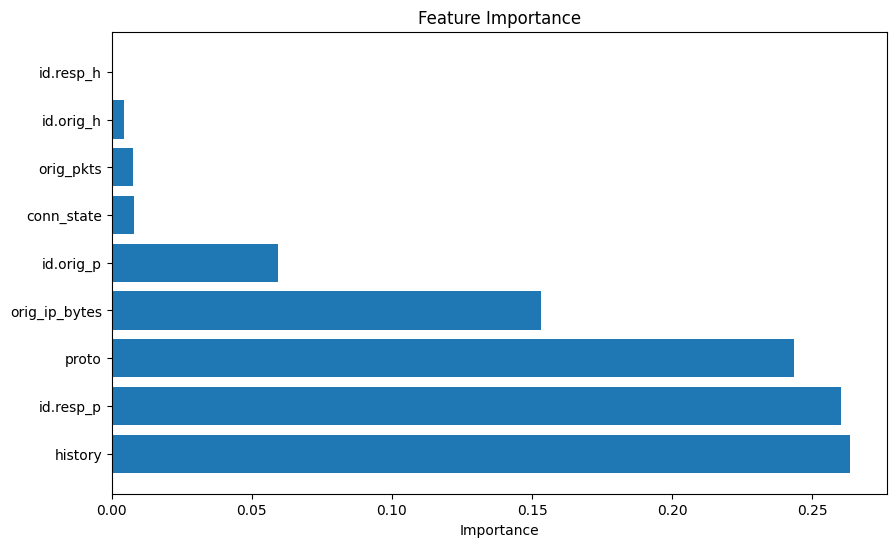

In [ ]:
# Separate the features and the target variable
X = df.drop('label', axis=1)
y = df['label']

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to your data
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns,
                                      'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance',
                                                          ascending=False)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')

# Show the plot
plt.show()
